# Python Tutorial 3 - Numeric Integration Revisited

### Code Academy Sidenote

* https://www.codecademy.com/learn/learn-python

### Markdown/Latex Sidenote

Jupyter-notebooks are very convenient because they include these markdown blocks to include discussion of the material.

Programs like Microsoft Word are examples of a "What you see is what you get" editor. In Markdown, you use characters and symbols to format your text, and then actually compile them.

For instance, I've been making liberal use of the header feature using the '#' pound/hashtag symbol. **Double click on this cell to see how I'm creating the text below.**

# First Header
## Second Header
### Tertiary Header
#### Etc

* Bullet Point
* Bullet Point 2
* Etc.

**Bolded Text**

_Italicized Text_

Those are a couple examples of some basic formatting. You can see more examples throughout this tutorial. The sidenote above has an example of a link, while there are examples of a chart, and a photo below. Take a look and see if you can reproduce it on your own!

For further reference: [Github's Markdown Guide](https://guides.github.com/features/mastering-markdown/)

## Latex Side Note

A big included feature in Jupyter-notebook markdown blocks is that you have the ability to include LaTeX formatted text as well. 

LaTeX (pronounced "La-tech") is similar to a markdown language in and of itself (it is not What-You-See-Is-What-You-Get). It is considerably more feature-full than markdown, but also has a bigger learning curve. I recommend that you use it just for math, as Markdown can't provide Math formatting.

* Start latex formatting with '\$\$' and end it with another '\$\$'
$$ math goes here $$

* All alphabetic characters are included in a LateX math statement is intended to be a variable, and is italicized. Basic math is very intuitive due to this.

$$ y = mx + b $$

* As soon as you get to fractions, you have to learn some LaTeX commands. Here we'll use the '\frac{}{}' command

$$ \frac{3}{5} $$

* I prefer creating equations in LaTeX to word in large part due to symbols. Most greek letters can be added with the '\letter' command. For instance '\lambda'

$$ \lambda \leq \pi + \Pi $$

* Most common functions are included as operators in LaTeX:

$$ \log_b(a) = \frac{\log(a)}{\log(a)} $$

Just that should be enough to cover most of the math you'll need in this course. Don't feel like you _have_ to use LaTeX. It is also acceptable to do your work out (neatly) on paper and include a photo.

# Hare and Lynx Example

### Adapted from [Dr. Kantor's Notes](https://github.com/jckantor/CBE30338/blob/master/notebooks/HareLynx/Hare%20and%20Lynx%20Population%20Dynamics.ipynb) 

### Introduction
We'd like to model the number of Hares and Lynx in a certain population of animals. 
![](http://boredomtherapy.com/wp-content/uploads/2015/12/14-canadian-lynx-paws-cute.jpg)
![](http://www.cbc.ca/kidscbc2/content/contests/cute_snowshoe1.jpg)

As cute as that Lynx is, it will prey on the Hare to the exclusion of all other animals if possible. This means the population levels of the Lynx and Hare are intrinsically related, see the pelt trading data for the Hudson's Bay Company:

![](MainLynx.jpg)



### Modeling

We can start with the basic equation of: change = in - out

$$
\frac{dH}{dt} = (Hare Birth Rate) - (Hare Death Rate) \\
\frac{dL}{dt} = (Lynx Birth Rate) - (Lynx Death Rate)
$$


#### Relevant Parameters

| Parameter | Symbol | Value |
| - | :----: | :---: |
| Lynx/Hare Predation Rate | $a$ | 3.2 |
| Lynx/Hare Conversion | $b$ | 0.6 |
| Lynx/Hare Michaelis Constant| $c$ | 50 |
| Lynx Death Rate | $d$ | 0.56 |
| Hare Carrying Capacity| $k$ | 125 |
| Hare Reproduction Rate | $r$ | 1.6 |

#### Model Equations
These parameters can be used to form a model:

$$
\frac{dH}{dt} = rH(1 - \frac{H}{k}) - \frac{aHL}{c + H}  \\
\frac{dL}{dt} = a \frac{bHL}{c + H} - d*L
$$

The focus of this tutorial is not on the development of these model equations, but do review the equations and try to make sense of them. It can help you in debugging steps later should you have an error.

### Programming and Plotting

#### Step 1: Initialization

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#### Step 2: Default Parameter Values

In [6]:
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

#### Step 3: Define the differential equations

In [7]:
def deriv(X,t):
    H,L = X
    dH =  r*H*(1-H/k) - a*H*L/(c+H)
    dL = b*a*H*L/(c+H) - d*L
    return [dH,dL]

#### Step 4: Integrate Differential Equations

In [8]:
# perform simulation
t = np.linspace(0,70,500)       # time grid
IC = [20,20]                    # initial conditions for H and L
sol = odeint(deriv,IC,t)        # compute solution
H,L = sol.transpose()           # unpack solution 

#### Step 5: Plot 

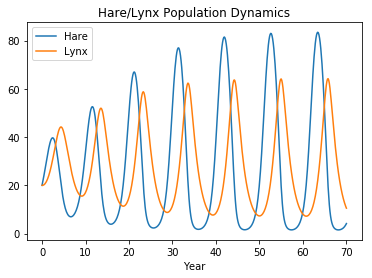

In [9]:
plt.plot(t,H,t,L)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare','Lynx'])

If you have more than one thing to plot, we can make use of the subplot feature

Text(0.5,0,'Hare')

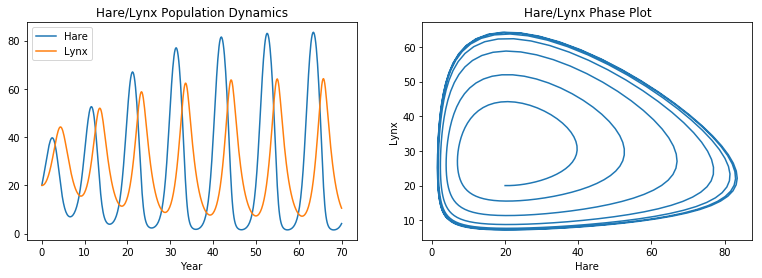

In [10]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(t,H,t,L)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare','Lynx'])

plt.subplot(1,2,2)
plt.plot(H,L)
plt.title('Hare/Lynx Phase Plot')
plt.ylabel('Lynx')
plt.xlabel('Hare')